In [1]:
#### MINOR PROJECT #####

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Build machine Learning model(classification) for the Iris flower species prediction dataset.
#Dataset link: Search on google.(The dataset will have about 150 rows and 5-6 columns).
#Do data ingestion (convert dataset into dataframe)
#Do some preprocessing(if required)
#Identify the input and output columns. Remove the unwanted columns(if necessary).
#Split the data into train and test.
#Build multiple ML models(use different classification algorithms) and compare the accuracies.(Google the best classification algorithms and use a few common ones here).
#Evaluate the model. 
#Create a streamlit app for the above model(optional).


In [4]:
#Adding libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Taking and Creating DataFrame
df=pd.read_csv("/content/drive/MyDrive/learn/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.duplicated().sum()

3

In [9]:
#Preprocessing (filtering data)
df=df.drop_duplicates()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [11]:
df.duplicated().sum()

0

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
#Identifing the input and output columns
X = df.iloc[:, [0,1,2,3]].values
y = df.iloc[:, 4].values
y.shape
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

In [14]:
# splitting the dataset into testing and training dataset
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.25)

In [16]:
X.shape

(147, 4)

In [17]:
X_train.shape

(110, 4)

In [18]:
X_test.shape

(37, 4)

In [19]:
X_train

array([[6.1, 2.8, 4.7, 1.2],
       [6.8, 3.2, 5.9, 2.3],
       [5.8, 2.8, 5.1, 2.4],
       [4.8, 3.4, 1.6, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [5.2, 3.4, 1.4, 0.2],
       [6. , 2.7, 5.1, 1.6],
       [5.1, 3.5, 1.4, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5.4, 3.4, 1.7, 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [5.5, 2.5, 4. , 1.3],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3.1, 1.6, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5.1, 2.5, 3. , 1.1],
       [6.1, 2.6, 5.6, 1.4],
       [6.7, 3.1, 4.7, 1.5],
       [4.6, 3.4, 1.4, 0.3],
       [5.7, 2.9, 4.2, 1.3],
       [6.4, 3.2, 5.3, 2.3],
       [4.7, 3.2, 1.6, 0.2],
       [6.8, 2.8, 4.8, 1.4],
       [5.1, 3.7, 1.5, 0.4],
       [4.9, 2.4, 3.3, 1. ],
       [5.4, 3.9, 1.3, 0.4],
       [5.7, 2.5, 5. , 2. ],
       [6.1, 3. , 4.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.5, 2

In [20]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


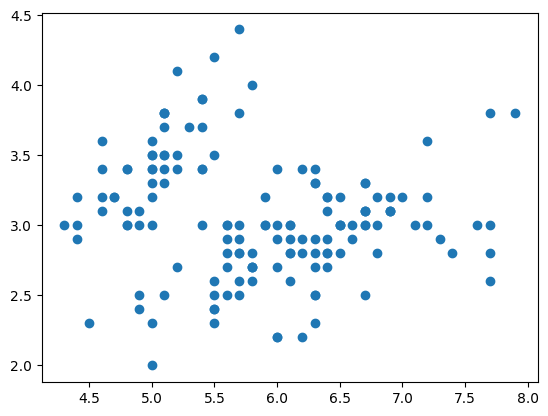

In [21]:
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.show()

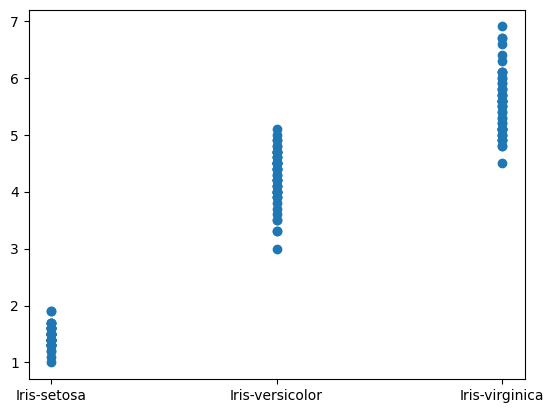

In [22]:
plt.scatter(df['species'],df['petal_length'])
plt.show()

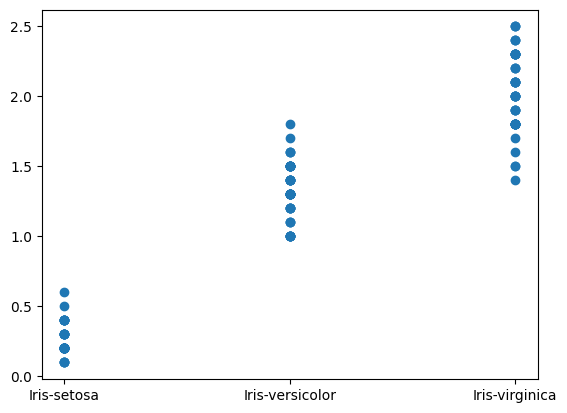

In [23]:
plt.scatter(df['species'],df['petal_width'])
plt.show()

In [24]:
df1=df[df['species']=='Iris-setosa']         # splitting
df2=df[df['species']=='Iris-virginica']
df3=df[df['species']=='Iris-versicolor']

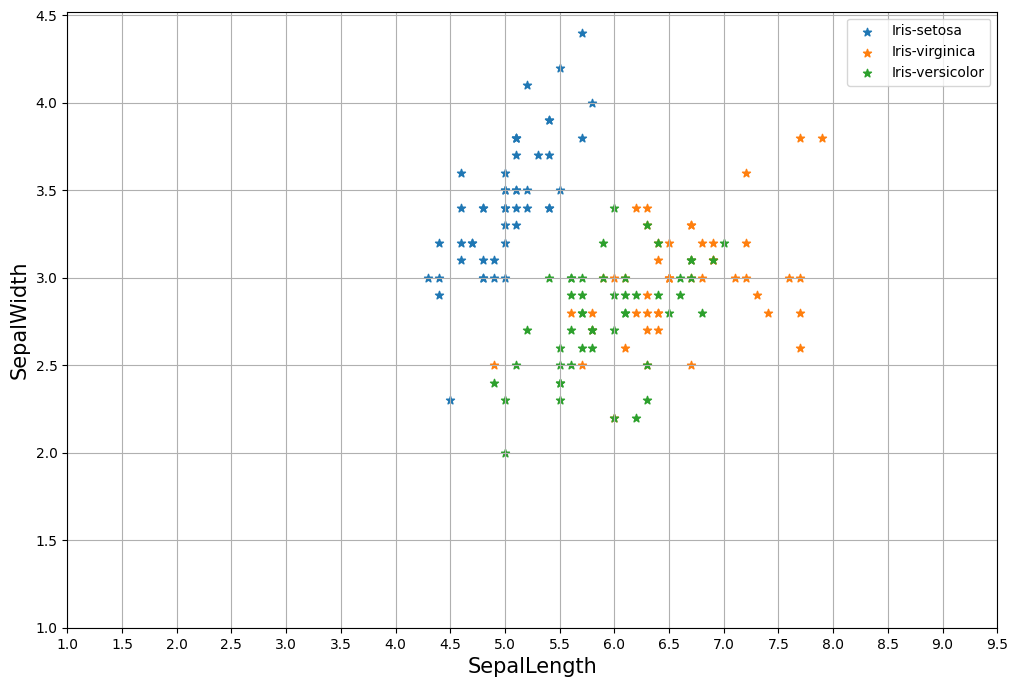

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(df1['sepal_length'],df1['sepal_width'],label='Iris-setosa',marker='*')
plt.scatter(df2['sepal_length'],df2['sepal_width'],label='Iris-virginica',marker='*')
plt.scatter(df3['sepal_length'],df3['sepal_width'],label='Iris-versicolor',marker='*')
plt.xlabel("SepalLength",fontsize=15)
plt.ylabel("SepalWidth",fontsize=15)
plt.xticks(np.arange(1,10,0.5))
plt.yticks(np.arange(1,5,0.5))
plt.grid()
plt.legend()
plt.show()

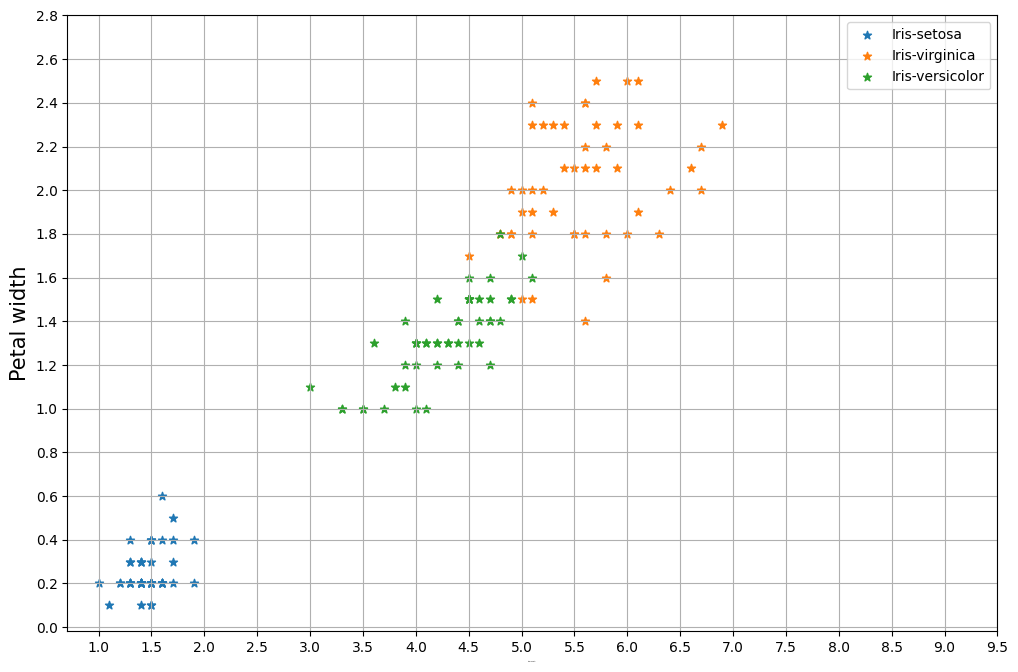

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(df1['petal_length'],df1['petal_width'],label='Iris-setosa',marker='*')
plt.scatter(df2['petal_length'],df2['petal_width'],label='Iris-virginica',marker='*')
plt.scatter(df3['petal_length'],df3['petal_width'],label='Iris-versicolor',marker='*')
plt.xlabel("PetalLength",fontsize=1)
plt.ylabel("Petal width",fontsize=15)
plt.xticks(np.arange(1,10,0.5))
plt.yticks(np.arange(0,3,0.2))
plt.grid()
plt.legend()
plt.show()

In [27]:
# standardisation for increasing the accuracy 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [28]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [29]:
model.fit(X_train_scaled,y_train) #fitting into model

KNeighborsClassifier(metric='euclidean')

In [30]:
y_p=model.predict(X_test_scaled)   # predicting
y_p

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
y_test # comparing the output

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
#evaluating the model
from sklearn.metrics import accuracy_score, classification_report

In [33]:
accuracy_score(y_p,y_test)   # accuracy is 100%

1.0

In [34]:
print(classification_report(y_p,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        37
      macro avg       1.00      1.00      1.00        37
   weighted avg       1.00      1.00      1.00        37



In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
pd.DataFrame(confusion_matrix(y_p,y_test),index=[' Iris-setosa_P','Iris-versicolor_A','Iris-virginica_A'],columns=[' Iris-setosa_P','Iris-versicolor_P','Iris-virginica_P'])

,Iris-setosa_P,Iris-versicolor_P,Iris-virginica_P
Iris-setosa_P,13,0,0
Iris-versicolor_A,0,12,0
Iris-virginica_A,0,0,12


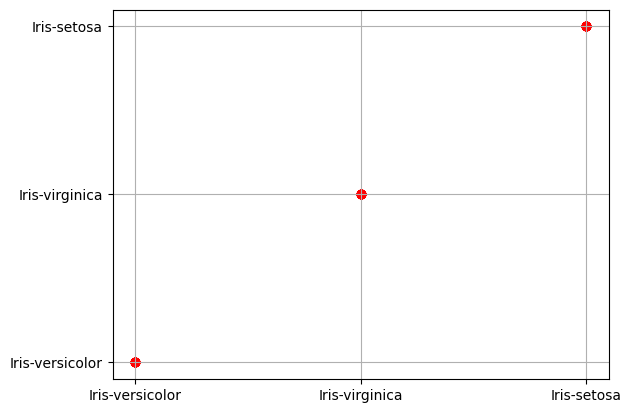

In [37]:
plt.scatter(y_p,y_test,color="red",marker='o')
plt.grid()
plt.show()

In [38]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

In [39]:
LR_model=LogisticRegression()
LR_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [40]:
y_p1=LR_model.predict(X_test_scaled)
y_p1

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
y_test

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [42]:
accuracy_score(y_p1,y_test) # accuracy is 100%

1.0

In [43]:
print(classification_report(y_p1,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        37
      macro avg       1.00      1.00      1.00        37
   weighted avg       1.00      1.00      1.00        37



In [44]:
pd.DataFrame(confusion_matrix(y_p1,y_test),index=[' Iris-setosa_P','Iris-versicolor_A','Iris-virginica_A'],columns=[' Iris-setosa_P','Iris-versicolor_P','Iris-virginica_P'])

,Iris-setosa_P,Iris-versicolor_P,Iris-virginica_P
Iris-setosa_P,13,0,0
Iris-versicolor_A,0,12,0
Iris-virginica_A,0,0,12


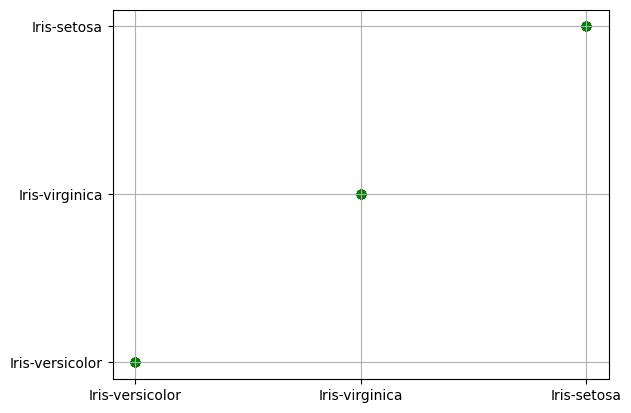

In [45]:
plt.scatter(y_p1,y_test,color="green",marker='o')
plt.grid()
plt.show()

In [46]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTC_model=DecisionTreeClassifier()
DTC_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [47]:
y_p2=DTC_model.predict(X_test_scaled)
y_p2

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:
y_test

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [49]:
accuracy_score(y_p2,y_test) # accuracy is 97%

0.972972972972973

In [50]:
print(classification_report(y_p2,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        37
      macro avg       0.97      0.97      0.97        37
   weighted avg       0.98      0.97      0.97        37



In [51]:
pd.DataFrame(confusion_matrix(y_p2,y_test),index=[' Iris-setosa_P','Iris-versicolor_A','Iris-virginica_A'],columns=[' Iris-setosa_P','Iris-versicolor_P','Iris-virginica_P'])

,Iris-setosa_P,Iris-versicolor_P,Iris-virginica_P
Iris-setosa_P,13,0,0
Iris-versicolor_A,0,12,1
Iris-virginica_A,0,0,11


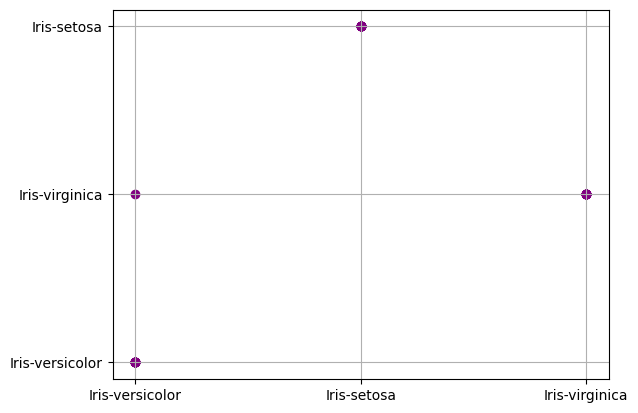

In [52]:
plt.scatter(y_p2,y_test,color="purple",marker='o')
plt.grid()
plt.show()

In [53]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [54]:
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [55]:
y_p3=rf_model.predict(X_test_scaled)
y_p3

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
y_test

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [57]:
accuracy_score(y_p3,y_test) #accuracy 97%

1.0

In [58]:
print(classification_report(y_p3,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        37
      macro avg       1.00      1.00      1.00        37
   weighted avg       1.00      1.00      1.00        37



In [59]:
pd.DataFrame(confusion_matrix(y_p3,y_test),index=[' Iris-setosa_P','Iris-versicolor_A','Iris-virginica_A'],columns=[' Iris-setosa_P','Iris-versicolor_P','Iris-virginica_P'])

,Iris-setosa_P,Iris-versicolor_P,Iris-virginica_P
Iris-setosa_P,13,0,0
Iris-versicolor_A,0,12,0
Iris-virginica_A,0,0,12


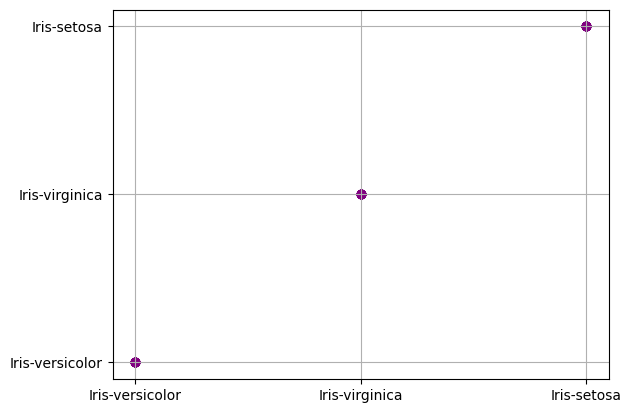

In [60]:
plt.scatter(y_p3,y_test,color="purple",marker='o')
plt.grid()
plt.show()

In [61]:
from sklearn.svm import SVC
model_4=SVC()

In [62]:
model_4.fit(X_test_scaled,y_test)

SVC()

In [63]:
y_p4=model_4.predict(X_test_scaled)
y_p4

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [64]:
accuracy_score(y_p4,y_test) #accuracy 100%

0.972972972972973

In [65]:
print(classification_report(y_p4,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        37
      macro avg       0.97      0.97      0.97        37
   weighted avg       0.98      0.97      0.97        37



In [66]:
pd.DataFrame(confusion_matrix(y_p4,y_test),index=[' Iris-setosa_P','Iris-versicolor_A','Iris-virginica_A'],columns=[' Iris-setosa_P','Iris-versicolor_P','Iris-virginica_P'])

,Iris-setosa_P,Iris-versicolor_P,Iris-virginica_P
Iris-setosa_P,13,0,0
Iris-versicolor_A,0,11,0
Iris-virginica_A,0,1,12


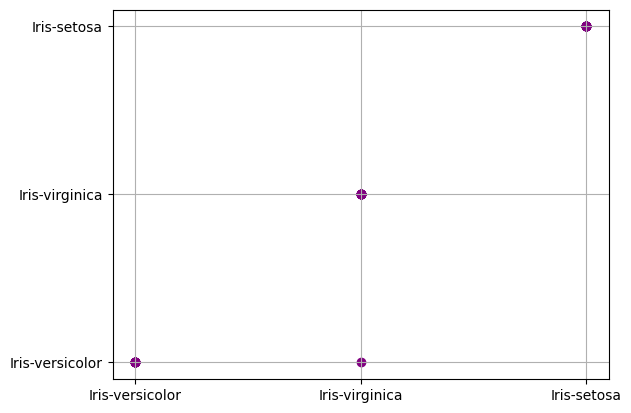

In [67]:
plt.scatter(y_p4,y_test,color="purple",marker='o')
plt.grid()
plt.show()